Enter the key encryption:Aman@123
Encryption key is valid.
Enter the key decryption:Aman@123


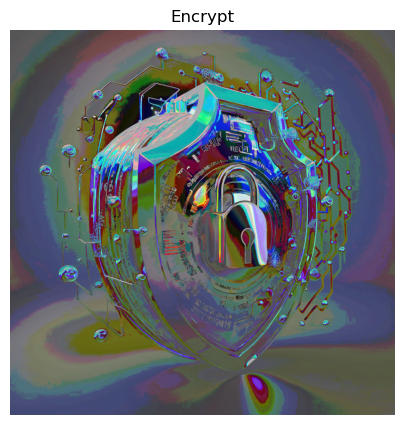

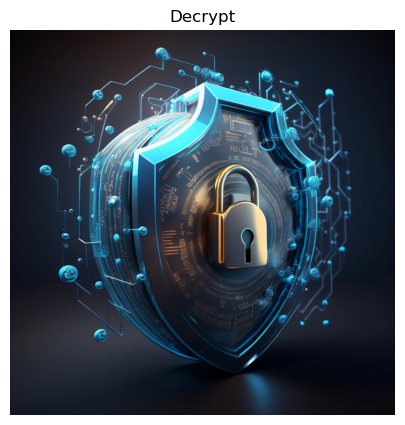

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import re

def validate_input(input_str):
    # Check if the input has at least 2 alphabets, 2 numbers, 2 special characters,
    # and is at least 8 characters long
    if (
        len(input_str) >= 8
        and len(re.findall(r'[a-zA-Z]', input_str)) >= 2
        and len(re.findall(r'[0-9]', input_str)) >= 2
        and len(re.findall(r'[!@#$%^&*()-_=+{};:,.<>?/\|`~]', input_str)) >= 3
    ):
        return True
    else:
        return False


def encrypt_image(image_path, key):
    # Load image
    img = Image.open(image_path)
    img_array = np.array(img)
    
    # Separate color channels
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
    
    # Convert key to string
    key_str = str(key)
    
    # Convert each character of the key to its ASCII code and apply modulo operation
    key_int = sum(ord(char) % 256 for char in key_str)
    
    # XOR each color channel with the key
    r_encrypted = np.bitwise_xor(r, key_int)
    g_encrypted = np.bitwise_xor(g, key_int)
    b_encrypted = np.bitwise_xor(b, key_int)
    
    # Combine encrypted color channels
    encrypted_img_array = np.stack((r_encrypted, g_encrypted, b_encrypted), axis=-1)
    
    # Create encrypted image from array
    encrypted_img = Image.fromarray(encrypted_img_array.astype('uint8'))
    
    return encrypted_img

def decrypt_image(encrypted_img, key):
    # Convert key to string
    key_str = str(key)
    
    # Convert each character of the key to its ASCII code and apply modulo operation
    key_int = sum(ord(char) % 256 for char in key_str)
    
    # Convert encrypted image to array
    encrypted_img_array = np.array(encrypted_img)
    
    # Separate color channels
    r_encrypted, g_encrypted, b_encrypted = encrypted_img_array[:,:,0], encrypted_img_array[:,:,1], encrypted_img_array[:,:,2]
    
    # XOR each color channel with the key
    r_decrypted = np.bitwise_xor(r_encrypted, key_int)
    g_decrypted = np.bitwise_xor(g_encrypted, key_int)
    b_decrypted = np.bitwise_xor(b_encrypted, key_int)
    
    # Combine decrypted color channels
    decrypted_img_array = np.stack((r_decrypted, g_decrypted, b_decrypted), axis=-1)
    
    # Create decrypted image from array
    decrypted_img = Image.fromarray(decrypted_img_array.astype('uint8'))
    
    return decrypted_img

# Example usage
image_path = "img.jpg"
eKey = input("Enter the key encryption:")  # Example key, you can use any string as a key

# Encrypt the image
encrypted_img = encrypt_image(image_path, eKey)

# Validate the input
if validate_input(eKey):
    print("Encryption key is valid.")
    dKey = input("Enter the key decryption:") 

    if(eKey==dKey):
        #display
        plt.figure(figsize=(20,5))
        plt.imshow(encrypted_img,cmap='gray')
        plt.title('Encrypt')
        plt.axis('off')
        # Decrypt the image
        decrypted_img = decrypt_image(encrypted_img, dKey)
        #display
        plt.figure(figsize=(20,5))
        plt.imshow(decrypted_img,cmap='gray')
        plt.title('Decrypt')
        plt.axis('off')
    else:
        print("Entered the wrong key")

else:
    print("Password is not valid. Make sure it has at least 2 alphabets, 2 numbers, 2 special characters, and is at least 8 characters long.")


